# Exploratory Data Analysis

In this worksheet, we'll be exploring the important aspects of our data and creating a clean dataframe that we can port over into our API calls in the next dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import sqlite3
import pandas as pd
import re

from pytz import timezone 
from datetime import datetime, timedelta, timezone
from meteostat import Stations, Daily, Point

### Importing Data

This dataset is provided in sqlite format, which we will then convert into a csv format that we can use. This is done using sqlite3, a built in function within python

In [2]:
cnx = sqlite3.connect('datasets/FPA_FOD_20170508.sqlite')

In [3]:
df_all = pd.read_sql_query("SELECT * FROM 'Fires'", cnx)
df = df_all[df_all['STATE'] == 'CA']
df.shape

(189550, 39)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(50)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,54,8,None,HIDDEN,None,None,None,None,None,2004,2453186.5,182,1800,1.0,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,58,9,None,FORK,None,None,None,None,None,2004,2453187.5,183,1800,1.0,Lightning,2453188.5,184.0,1400,0.10,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,3,02,BK5X,SLATE,None,None,None,None,None,2005,2453437.5,67,1300,5.0,Debris Burning,2453437.5,67.0,1600,0.80,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,5,03,BLPQ,SHASTA,None,None,None,None,None,2005,2453444.5,74,1200,5.0,Debris Burning,2453444.5,74.0,1700,1.00,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,61,10,None,TANGLEFOOT,None,None,None,None,None,2004,2453187.5,183,1800,1.0,Lightning,2453188.5,184.0,1800,0.10,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [6]:
df.shape

df['FIRE_SIZE_CLASS'].value_counts(normalize = True)

A    0.518644
B    0.405919
C    0.051833
D    0.011274
E    0.006262
F    0.003988
G    0.002079
Name: FIRE_SIZE_CLASS, dtype: float64

### Cleaning

To improve the efficacy of the next steps in this process, we'll clean the data to ensure the our dataset only contains complete data.

#### Removing Null Values

In [7]:
df.isna().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          127617
LOCAL_INCIDENT_ID              61567
FIRE_CODE                     134017
FIRE_NAME                      14993
ICS_209_INCIDENT_NUMBER       186712
ICS_209_NAME                  186712
MTBS_ID                       188413
MTBS_FIRE_NAME                188413
COMPLEX_NAME                  188623
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                 79333
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                      97642
CONT_DOY                       97642
C

#### Distributions of Datasets

Before we drop values, let's look at the distributions of the datasets with and without time/date data. This data is valuable, but it contains a large number of missing values.

#### Distribution with Date of Containment

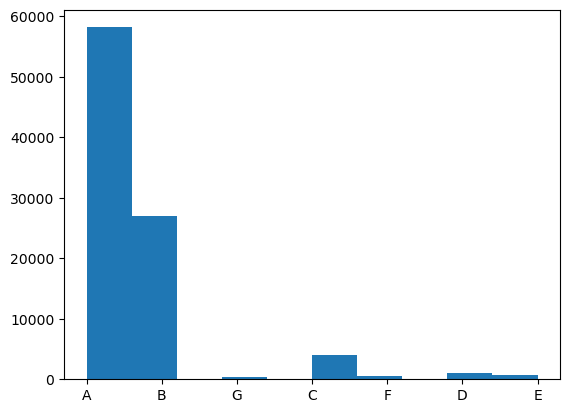

In [8]:
 plt.hist(df['FIRE_SIZE_CLASS'][~df['CONT_DOY'].isna()]);

#### Distribution without Date of Containment

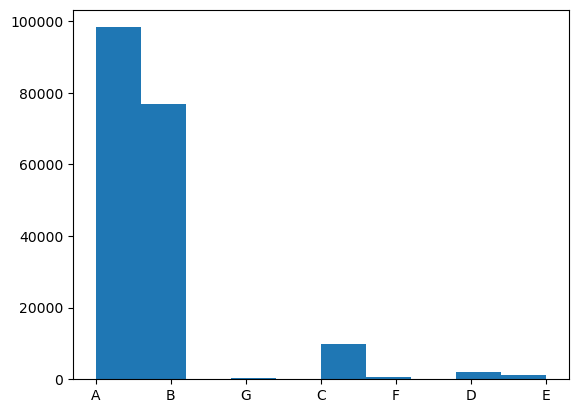

In [9]:
plt.hist(df['FIRE_SIZE_CLASS']);

The feature DOY Containment doesn't meaningfully change the distribution of values and so we will remove the null values from this feature.

#### Creating Duration Column

Before we drop mull values, we will create a duration column

In [10]:
df['duration'] = np.where(df['CONT_DOY']>=df['DISCOVERY_DOY'], 
                           df['CONT_DOY']-df['DISCOVERY_DOY'], 
                           (365-df['DISCOVERY_DOY'])+df['CONT_DOY'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
df_clean = df[~df['duration'].isna()]

In [12]:
df_clean = df_clean.dropna(axis=1)

In [13]:
df_clean.shape

(91908, 26)

In [14]:
df_clean['duration']

0          0.0
1          0.0
2          0.0
3          5.0
4          5.0
          ... 
1880456    0.0
1880457    1.0
1880458    5.0
1880459    0.0
1880460    0.0
Name: duration, Length: 91908, dtype: float64

In [15]:
df_clean.isna().sum().sum()

0

The result of dropping null values in the dataset is losing features, not rows. The resulting dataset is 17 columns narrower, but we haven't removed any rows. We'll further trim the remaining features to determine which features are most important before proceeding to feature engineering.

#### Checking for Duplicates

Let's check for duplicate values in the dataset before we proceed. This portion of the process will become more difficult once we begin to manipulate the data.


In [16]:
duplicates = df_clean.duplicated(subset=['OBJECTID', 'SOURCE_REPORTING_UNIT'])

Based on the above line, there are no duplicated values in the dataset

### Pruning Unnecessary Features

Our goal with this analysis is to predict the overall fire size. Given this problem statement, we can now remove features included in the data that are clearly irrelevant to the task.

In [17]:
df_clean.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Shape', 'duration'],
      dtype='object')

#### NWCG Reporting Agency

In [18]:
df_clean['NWCG_REPORTING_AGENCY'].value_counts()

FS        42610
BLM       20029
ST/C&L    15052
BIA        6956
FWS        3939
NPS        3301
BOR          13
DOD           8
Name: NWCG_REPORTING_AGENCY, dtype: int64

The reporting agency is well distributed,numerous ,and may be valuable to the overall mission of the analysis. We would have likely removed this feature if there were only several important agencies included in the list.

#### NWCG_REPORTING_UNIT_NAME & NWCG_REPORTING_UNIT_ID

In [19]:
df_clean['NWCG_REPORTING_UNIT_NAME'].value_counts(ascending = False)

Central California District               7573
California Desert District                7063
Northern California District              5169
Angeles National Forest                   4885
San Bernardino National Forest            4099
                                          ... 
Lake Mead National Recreation Area           1
Northern California Area Office              1
John Muir National Historic Site             1
Klamath Marsh National Wildlife Refuge       1
Lakeview District                            1
Name: NWCG_REPORTING_UNIT_NAME, Length: 130, dtype: int64

Similar to the NWCG_REPORTING_AGENCY feature, NWCG_REPORTING_UNIT_NAME has a diverse group of agencies. However because there are so many agencies that are only mentioned once, we'll remove this feature entirely.

This is because the agencies that are only reported once could represent a form of data leakage for our model. It's possible that the agencies that are only represented once in the above list could have an outsized influence on the overall result of the model. It would be better if this individual feature were balanced. 

#### OWNER_DESCR

This feature describes the type of land the fire was reported on. It's likely that the resultant size of a fire is dependent on the time it takes for authorities to discover the fire. If a fire originates in an area that humans frequent, this improves the likelyhood a fire is extinguished before it becomes uncontrollable.

As we move through our analysis, this feature could be beneficial, as we don't know if private property or government land would be more or less likely to be occupied. We'll opt to remove this column.

In [20]:
df_clean['OWNER_DESCR'].value_counts()

USFS                     31420
MISSING/NOT SPECIFIED    15009
PRIVATE                  14173
STATE OR PRIVATE          9911
BLM                       6042
BIA                       5197
OTHER FEDERAL             3250
NPS                       2803
TRIBAL                    1436
STATE                     1037
FWS                        695
UNDEFINED FEDERAL          480
MUNICIPAL/LOCAL            228
BOR                        129
COUNTY                      95
FOREIGN                      3
Name: OWNER_DESCR, dtype: int64

This feature is well balanced and could be valuable to the result

#### FIRE_SIZE_CLASS

In [21]:
df_clean['FIRE_SIZE_CLASS'].value_counts()

A    58189
B    26986
C     4078
D     1052
E      719
F      545
G      339
Name: FIRE_SIZE_CLASS, dtype: int64

#### SOURCE_REPORTING_NAME

SOURCE_REPORTING_NAME represents a duplicate, but numerical, version of the feature called SOURCE_REPORTING_ID. We'll remove this feature

In [22]:
remove_cols = ['OBJECTID','Shape','FOD_ID','FPA_ID','NWCG_REPORTING_UNIT_NAME',
               'NWCG_REPORTING_UNIT_ID','OWNER_DESCR',
               'SOURCE_SYSTEM','SOURCE_REPORTING_UNIT','NWCG_REPORTING_AGENCY']

In [23]:
df_clean = df_clean.drop(remove_cols,axis=1)

In [24]:
df_clean

,SOURCE_SYSTEM_TYPE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,duration
0,FED,Plumas National Forest,2005,2453403.5,33,9.0,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,5.0,CA,0.0
1,FED,Eldorado National Forest,2004,2453137.5,133,1.0,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,5.0,CA,0.0
2,FED,Eldorado National Forest,2004,2453156.5,152,5.0,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,13.0,CA,0.0
3,FED,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,5.0,CA,5.0
4,FED,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,5.0,CA,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,NONFED,Tehama-Glenn Unit,2015,2457187.5,165,13.0,Missing/Undefined,2457187.5,165.0,2.22,B,40.019907,-122.391398,13.0,CA,0.0
1880457,NONFED,Shasta-Trinity Unit,2015,2457295.5,273,7.0,Arson,2457296.5,274.0,1.00,B,40.588583,-123.069617,13.0,CA,1.0
1880458,NONFED,Humboldt-Del Norte Unit,2015,2457235.5,213,1.0,Lightning,2457240.5,218.0,4.00,B,40.244833,-123.544167,15.0,CA,5.0
1880459,NONFED,Sonoma-Lake Napa Unit,2015,2457170.5,148,9.0,Miscellaneous,2457170.5,148.0,0.50,B,38.415608,-122.660044,13.0,CA,0.0


In [25]:
df_clean['FIRE_YEAR'].sort_values(ascending= True)

47605      1992
215680     1992
215681     1992
215682     1992
215683     1992
           ... 
1844734    2015
1844735    2015
1844736    2015
1844723    2015
1880460    2015
Name: FIRE_YEAR, Length: 91908, dtype: int64

In [26]:
model = ['DISCOVERY_DOY','STAT_CAUSE_DESCR',
         'STATE','SOURCE_SYSTEM_TYPE','duration','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','SOURCE_REPORTING_UNIT_NAME','FIRE_YEAR','FIRE_SIZE']
description = ['SOURCE_REPORTING_UNIT_NAME','FIRE_YEAR','DISCOVERY_MONTH','DISCOVERY_DATE','DISCOVERY_DAY']

In [27]:
df_description = df_clean

### Data Manipulation

Because our target features are describing similar causes, we'll compile similar causes into the same bin. This will help our model identify the correct cause of a fire, as it reduces the number of possibilities it has to choose from. Additionally, this improves the accuracy of our result as granularity in cause description isn't necessary for this purpose.

In [28]:
df_model = df_clean[model]
df_model['STAT_CAUSE_DESCR'].value_counts()

Lightning            23020
Miscellaneous        21354
Equipment Use        11260
Arson                11085
Campfire              7751
Missing/Undefined     6039
Debris Burning        5312
Smoking               2342
Children              2231
Powerline              914
Railroad               259
Fireworks              219
Structure              122
Name: STAT_CAUSE_DESCR, dtype: int64

In [29]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Missing/Undefined', np.nan, df_model['STAT_CAUSE_DESCR'])
df_model.dropna()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE
0,33,Miscellaneous,CA,FED,0.0,A,40.036944,-121.005833,Plumas National Forest,2005,0.10
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25
2,152,Debris Burning,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10
...,...,...,...,...,...,...,...,...,...,...,...
1880451,157,Equipment Use,CA,NONFED,0.0,B,38.644183,-120.863673,Amador-El Dorado Unit,2015,1.00
1880455,179,Miscellaneous,CA,NONFED,1.0,B,37.936253,-120.613743,Tuolumne-Calaveras Unit,2015,5.30
1880457,273,Arson,CA,NONFED,1.0,B,40.588583,-123.069617,Shasta-Trinity Unit,2015,1.00
1880458,213,Lightning,CA,NONFED,5.0,B,40.244833,-123.544167,Humboldt-Del Norte Unit,2015,4.00


In [30]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Railroad', 'Equipment Use', df_model['STAT_CAUSE_DESCR'] )

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Fireworks', 'Smoking', df_model['STAT_CAUSE_DESCR'])
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Campfire', 'Smoking', df_model['STAT_CAUSE_DESCR'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Smoking', 'Negligence',df_model['STAT_CAUSE_DESCR'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Debris Burning', 'Negligence',df_model['STAT_CAUSE_DESCR'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Structure', 'Powerline', df_model['STAT_CAUSE_DESCR'])
df_model['STAT_CAUSE_DESCR'] = np.where(df_model['STAT_CAUSE_DESCR'] == 'Powerline', 'Infrastructure', df_model['STAT_CAUSE_DESCR'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df_model['STAT_CAUSE_DESCR'].value_counts()

Lightning         23020
Miscellaneous     21354
Negligence        15624
Equipment Use     11519
Arson             11085
Children           2231
Infrastructure     1036
Name: STAT_CAUSE_DESCR, dtype: int64

In [36]:
df_model.dtypes

DISCOVERY_DOY                   int64
STAT_CAUSE_DESCR               object
STATE                          object
SOURCE_SYSTEM_TYPE             object
duration                      float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64
LONGITUDE                     float64
SOURCE_REPORTING_UNIT_NAME     object
FIRE_YEAR                       int64
FIRE_SIZE                     float64
dtype: object

In [37]:
df_description.to_csv('datasets/data_description.csv',index = False)

In [38]:
df_model.to_csv('datasets/data_model.csv',index = False)

### Saving dfs as variables using Pickle

In [39]:
with open('pickles/df_description.pkl', 'wb') as f:
    pickle.dump(df_description, f)
    
with open('pickles/df_model.pkl', 'wb') as f:
    pickle.dump(df_model, f)